In [1]:
%matplotlib inline
# common functions used in the project of VR-R in GAC direction
import numpy as np
#import scipy.linalg as splin
import numpy.linalg as nl
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
font = {'size' : 20}
matplotlib.rc('font', **font)
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.special as special
import astropy.io.fits as fits
import math as m
import emcee
import corner
import pandas as pd
import csv
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import sys
sys.path.append('/Users/htian/Documents/GitHub/astroth/')
import CoordinateConversion as CC
import galpy.util.bovy_coords as gub
import sfdmap
# m=sfdmap.SFDMap('/Users/htian/Documents/GitHub/sfddata-master',scaling=1.0)
# m.ebv([100.,0.],[40.,20.],frame=)

In [2]:
dpath = "/Users/htian/Documents/work/data/Gaia_Mgiant_candidate/"
ppath = "/Users/htian/Documents/work/plots/Gaia_Mgiant_candidate/"
fn = "GDR2_Mgiant_candidate_color2_b20_gmag10_20_rest_4000.fits"
# fn = "Gaia_XMTACH_LiJ_MG.fits"

In [3]:
dt = fits.open(dpath+fn)
data = dt[1].data

In [4]:
# for i in dt[1].columns:
#     print(i)
print(np.tan(20*m.pi/180)*8.)

2.9117618741296187


In [5]:
raG = np.array(data["ra"])
decG = np.array(data["dec"])
pmraG = np.array(data["pmra"])
pmdecG = np.array(data["pmdec"])
MagG = np.array(data["phot_g_mean_mag"])
lG = np.array(data["l"])
bG = np.array(data["b"])
S_ID = data["source_id_1"]
DUP = data
sag_coo = CC.radec2sag(raG,decG)
csag_coo = CC.radec2sag(np.array([266]),np.array([-30]))
sag_c_coo = CC.radec2sag(np.array([283.8313]),np.array([-30.5453]))
lb_sag = gub.radec_to_lb(np.array([283.8313]),np.array([-30.5453]),degree=True)
Lam = sag_coo[:,0]
Lam = (Lam+360) % 360
Bet = sag_coo[:,1]
pmllbb = gub.pmrapmdec_to_pmllpmbb(pmraG,pmdecG,raG,decG,degree=True)
# ref_epoch = data["ref_epoch"]
# ra = Longitude(raG, unit=u.deg)
# dec = Latitude(decG, unit=u.deg)
# c = SkyCoord(ra, dec,  frame='icrs')
# c_fk5 = c.transform_to(FK5(equinox='J2015.5'))
# c_fk5
# print(raG[:3])
# c
C_LMC = [78.77, -69.01]
C_SMC = [16.26, -72.42]
D2LMC = np.sqrt((raG-C_LMC[0])**2*np.cos(C_LMC[1]*m.pi/180)**2 + (decG-C_LMC[1])**2)
D2SMC = np.sqrt((raG-C_SMC[0])**2*np.cos(C_SMC[1]*m.pi/180)**2 + (decG-C_SMC[1])**2)
R_LMC, R_SMC = 13,8

Ds = 10**((MagG+2)/5)/100
Dsag = np.sqrt(25.2**2+2.5**2+6.4**2)

print(np.max(Ds),Dsag)

251.1873707110856 26.119915773217954


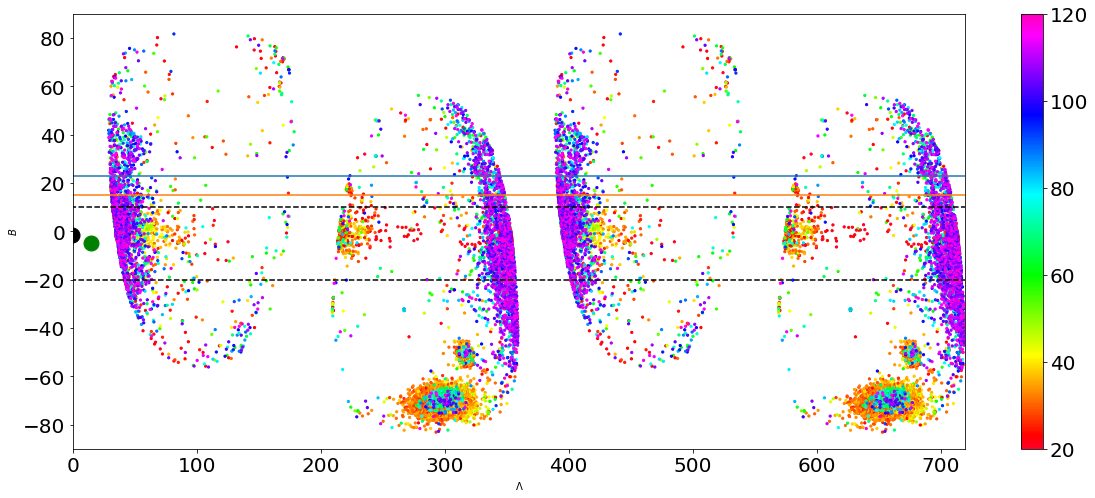

[[14.99196299 -4.76757515]]


In [6]:
ind_LMC = D2LMC<R_LMC
ind_SMC = D2SMC<R_SMC
fig = plt.figure(figsize=(20,8))
# plt.plot(Lam,Bet,'k.',markersize=1)
# plt.plot(Lam+360,Bet,'k.',markersize=1)
indd = (Ds>20) & (Ds<120) #& (D2LMC>R_LMC) & (D2SMC>R_SMC)
plt.scatter(Lam[indd],Bet[indd],s=5,c = Ds[indd],cmap='gist_rainbow',vmin = 20,vmax=120)
plt.scatter(Lam[indd]+360,Bet[indd],s=5,c = Ds[indd],cmap='gist_rainbow',vmin = 20,vmax=120)
# plt.plot(Lam[ind_LMC],Bet[ind_LMC],'r.',markersize=1)
# plt.plot(Lam[ind_LMC]+360,Bet[ind_LMC],'r.',markersize=1)
# plt.plot(Lam[ind_SMC],Bet[ind_SMC],'b.',markersize=1)
# plt.plot(Lam[ind_SMC]+360,Bet[ind_SMC],'b.',markersize=1)
plt.plot(csag_coo[0,0],csag_coo[0,1],'go',markersize=15)
plt.plot(sag_c_coo[0,0],sag_c_coo[0,1],'ko',markersize=15)
plt.plot([-180,780],[23,23])
plt.plot([-180,780],[15,15])
plt.plot([-180,780],[10,10],'k--')
plt.plot([-180,780],[-20,-20],'k--')
plt.axis([0,720,-90,90])
plt.xlabel("$\Lambda$")
plt.ylabel("$B$")
plt.colorbar()
plt.show()
print(csag_coo)

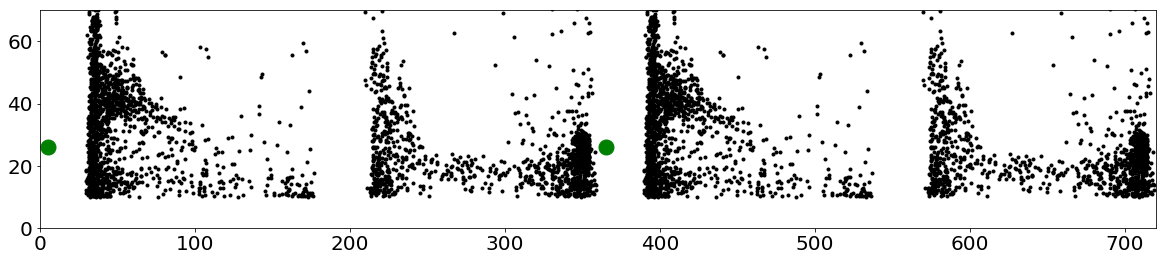

[0, 360, 0, 120]

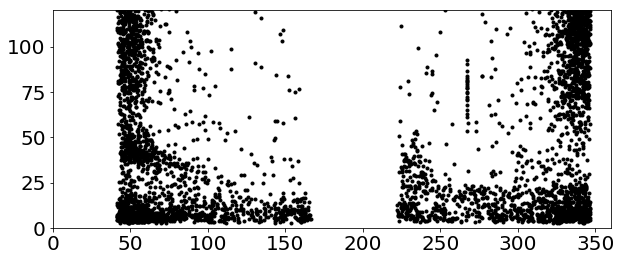

In [22]:
fig = plt.figure(figsize=(20,4))
ind_sag = (np.abs(Bet)<40)  & (D2LMC>R_LMC) & (D2SMC>R_SMC) & (np.sqrt((pmraG+1)**2+(pmdecG+2)**2)<2) & (Ds>10) & (Ds<150)
ind_sag0 = ((np.abs(Bet-19)<4)) & (Lam<250) & (Lam>200) # & (D2LMC>R_LMC) & (D2SMC>R_SMC) & (np.sqrt((pmraG+1)**2+(pmdecG+2)**2)<2) & (Ds>20) & (Ds<120)
plt.plot(Lam[ind_sag],Ds[ind_sag],'k.')
plt.plot(Lam[ind_sag]+360,Ds[ind_sag],'k.')
plt.plot(lb_sag[0,0],[Dsag],'go',markersize=15)
plt.plot(lb_sag[0,0]+360,[Dsag],'go',markersize=15)
# plt.plot(Lam[ind_sag0],Ds[ind_sag0],'r.')
plt.axis([0,720,0,70])
plt.show()
ind_sag1 = (D2LMC>R_LMC) & (D2SMC>R_SMC) & (np.abs(bG)>30)
fig = plt.figure(figsize=(10,4))
plt.plot(Lam[ind_sag1],Ds[ind_sag1],'k.')
plt.axis([0,360,0,120])

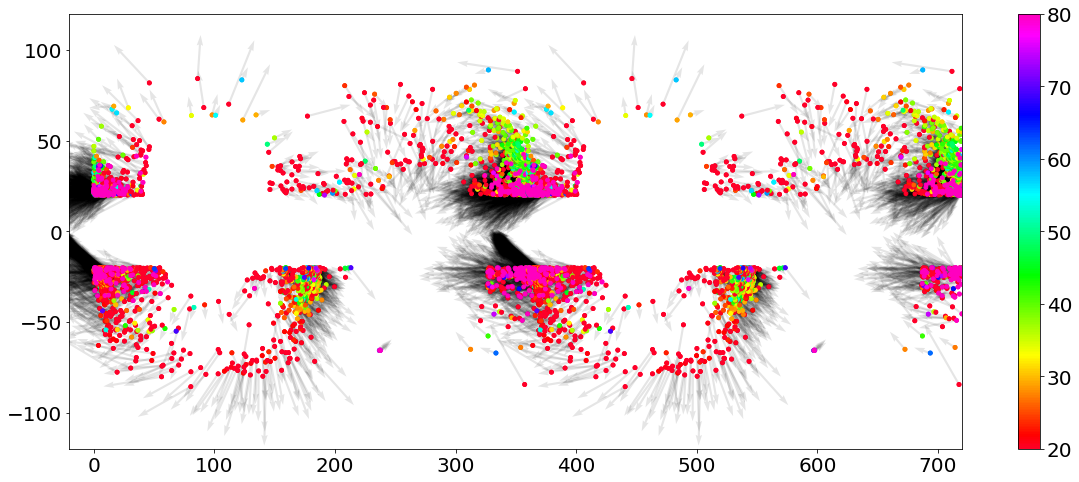

[-5, 5, -5, 5]

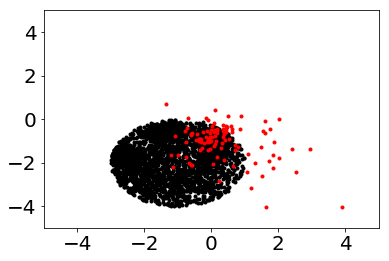

In [21]:
fig = plt.figure(figsize=(20,8))
plt.scatter(lG[ind_sag],bG[ind_sag],s=15,c=Ds[ind_sag],cmap='gist_rainbow',vmin=20,vmax=80)
plt.scatter(lG[ind_sag]+360,bG[ind_sag],s=15,c=Ds[ind_sag],cmap='gist_rainbow',vmin=20,vmax=80)
plt.colorbar()
plt.quiver(lG[ind_sag],bG[ind_sag],pmllbb[ind_sag,0],pmllbb[ind_sag,1],scale=50,alpha=0.1)
plt.quiver(lG[ind_sag]+360,bG[ind_sag],pmllbb[ind_sag,0],pmllbb[ind_sag,1],scale=50,alpha=0.1)
plt.scatter(lG[ind_sag],bG[ind_sag],s=15,c=Ds[ind_sag],cmap='gist_rainbow',vmin=20,vmax=80)
plt.scatter(lG[ind_sag]+360,bG[ind_sag],s=15,c=Ds[ind_sag],cmap='gist_rainbow',vmin=20,vmax=80)
plt.axis([-20,720,-120,120])
plt.show()
plt.plot(pmraG[ind_sag],pmdecG[ind_sag],'k.')
plt.plot(pmraG[ind_sag0],pmdecG[ind_sag0],'r.')
# plt.plot(pmraG[ind_sag],pmdecG[ind_sag],'k.')
plt.axis([-5,5,-5,5])

90.0


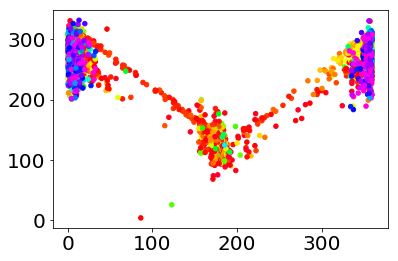

In [9]:
theta_pm = np.arctan2(pmllbb[ind_sag,0],pmllbb[ind_sag,1])*180/m.pi
theta_pm = (theta_pm+360)%360
plt.scatter(lG[ind_sag],theta_pm,s=20,c = Ds[ind_sag],cmap='gist_rainbow')
plt.colorbar
print(np.arctan2(1,0)*180/m.pi)

In [10]:
# pmllbb = gub.pmrapmdec_to_pmllpmbb(pmraG[ind],pmdecG[ind],raG[ind],decG[ind],degree=True)
# # plt.plot(lG,bG,'k.')
# # plt.plot(lG[ind],bG[ind],'r.')
# plt.quiver(lG[ind],bG[ind],pmllbb[:,0],pmllbb[:,1],scale=25)

In [11]:
# #  fornax dwarf
# C_N = [39.91,-34.59]
# D2N = np.sqrt((raG-C_N[0])**2*np.cos(C_N[1]*m.pi/180)**2 + (decG-C_N[1])**2)
# R_N = 2
# ind_n = D2N<R_N
# print(S_ID[ind_n])
# print(len(S_ID[ind_n]))
# print(len(np.unique(S_ID[ind_n])))
# plt.plot(raG[ind_n],decG[ind_n],'k.')
# plt.quiver(raG[ind_n],decG[ind_n],pmraG[ind_n],pmdecG[ind_n])

In [12]:
# plt.plot(raG[ind],pmraG[ind],'k.')

In [13]:
# # this is used to select Mgiant branch stars
# arr_age1 = ["1","2","5"]
# arr_age2 = ["7","8","9"]
# fmt = ['r-','b-','g-','m-','']
# fmt = ['r.','b.','g.','m.','']
# fig = plt.figure(figsize=(4,4))
# for i in range(0,3):
#     s_age1 = arr_age1[i]
#     for j in range(0,3):
#         s_age2 = arr_age2[j]
#         fn = "CMD_"+s_age1+"e"+s_age2+"_0152.dat"
# #         fn = "CMD_1e10_0152.dat"
#         print(fn,'----   ',fmt[i])
#         data = np.loadtxt(dpath+fn,skiprows=8)
#         data = data[:-1,:]
#         Gmag = data[:,-3]
#         BPmag = data[:,-2]
#         RPmag = data[:,-1]
#         plt.plot(BPmag[:-1]-RPmag[:-1],Gmag[:-1],fmt[i],markersize=0.5)
#         m_min = 1.
#         m_max = 30
# #         m_max = 1.04
#         ind = (data[:,2]>m_min) & (data[:,2]<m_max)
# #         plt.scatter(BPmag[ind]-RPmag[ind],Gmag[ind],c=data[ind,2],cmap="gist_rainbow",vmin=m_min,vmax=m_max,s=5)
# #         indout = ((BPmag-RPmag)>2.5) & (data[:,2]>m_min) & (data[:,2]<m_max)
# #         output = np.zeros((len(Gmag[indout]),3))
# #         output[:,0] = Gmag[indout]
# #         output[:,1] = BPmag[indout]-RPmag[indout]
# #         output[:,2] = data[indout,2]
# #         np.savetxt(dpath+"MGB_"+fn,output,fmt="%f")
# # plt.colorbar()
# fn = "CMD_1e10_0152.dat"
# print(fn,'----   ',fmt[i])
# data = np.loadtxt(dpath+fn,skiprows=8)
# data = data[:-1,:]
# Gmag = data[:,-3]
# BPmag = data[:,-2]
# RPmag = data[:,-1]
# plt.plot(BPmag[:-1]-RPmag[:-1],Gmag[:-1],'k.',markersize=0.5)
# plt.plot([2.5,2.5],[15,-15],'k--')
# # plt.axis([-2.5,6,10,-15])
# plt.axis([2.5,6,0,-4])
# plt.xlabel("Bp-Rp")
# plt.ylabel("G")

In [14]:
# data = np.loadtxt(dpath+"isochrone_5e8_0152.dat",skiprows=8)
# Gmag = data[:,-3]
# BPmag = data[:,-2]
# RPmag = data[:,-1]

In [15]:
# data0 = np.loadtxt("/Users/htian/Downloads/output243166570858.dat",skiprows=8)
# Gmag0 = data0[:,-3]
# BPmag0 = data0[:,-2]
# RPmag0 = data0[:,-1]

In [16]:
# plt.plot(BPmag-RPmag,Gmag,'k.')
# plt.plot(BPmag0-RPmag0,Gmag0,'r.')
# plt.plot(BPmag-RPmag,Gmag,'k.')
# plt.axis([-1,5,15,-10])

In [17]:
10**((15.5+2)/5)/100


31.622776601683796

In [18]:
e = np.zeros(5)
a = b = c = np.zeros_like(e)